In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-juprhyc1
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-juprhyc1
     |████████████████████████████████| 129 kB 27.3 MB/s 
     |████████████████████████████████| 344 kB 93.0 MB/s 
     |████████████████████████████████| 54.7 MB 133.3 MB/s 
     |████████████████████████████████| 4.5 MB 84.3 MB/s 
     |████████████████████████████████| 1.2 MB 87.1 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.1 MB/s eta 0:00:43tcmalloc: large alloc 1147494400 bytes == 0x3941e000 @  0x7f3cf3604615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8

In [ ]:
# gpu 프리미엄 사용 시
!pip3 install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 133.6 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x3a4da000 @  0x7f7b09031615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████▌               | 1055.7 MB 125.1 MB/s eta 0:00:08tcmalloc: large alloc 1434370048 bytes == 0x7eb30000 @  0x7f7b09031615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |█

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from sklearn.model_selection import train_test_split

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
import pandas as pd
from tqdm.notebook import tqdm

import re

In [ ]:
##GPU 사용 시
device = torch.device("cuda:0")

bertmodel, vocab = get_pytorch_kobert_model()

from transformers import AutoTokenizer, AutoModelForSequenceClassification

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


### 데이터 전처리


In [ ]:
import pandas as pd

# 데이터 입력


In [ ]:
df_sent = pd.read_csv('/content/drive/MyDrive/뉴스원인분석_modeling/data/kia_new_label_sentsplit_news_label_1231.csv')
df_sent = df_sent.sample(frac=1)
df_sent = df_sent.reset_index(drop=True)
df_sent

,date,sent,label,전일비_비율,targetpm,news_id
0,2020-06-15,"올 14분기 현대기아차의 인도 시장 점유율은 22.514만7,539대로 지난해 동기...",0,-8.00,1,20756
1,2019-02-19,글로벌 국가 7곳에 센터를 신설하고 분야 기술을 끌어모으는 한편 국민적 관심과 불...,1,-1.26,1,9817
2,2018-12-12,현대기아차 차량성능 담당 알버트 비어만lbert iermann 사장이 신임 연구개발...,4,3.03,3,8159
3,2020-01-13,박원순 서울시장이 10일현지시간 미국 서부의 세계적인 명문대인 스탠포드대학에서 나이...,2,0.12,3,17277
4,2022-04-18,"이경민 대신증권 연구원은 중국 경기불안, 유가 상승압력 확대에 따른 인플레이션 정점...",3,1.96,3,36882
...,...,...,...,...,...,...
743314,2018-10-08,승부는 연장전에서 갈렸다.,1,-0.88,1,6502
743315,2021-09-03,현대제철의 경우 자동차와 조선 관련 수요 확대와 판가 인상으로 연간 영업이익이 지난...,3,2.51,3,31702
743316,2021-08-24,이미 임단협을 타결한 현대차와 매각 절차 중인 쌍용차를 제외한 3개 완성차 업체가 ...,3,1.50,3,31472
743317,2022-07-20,부산국제모터쇼는 2001년을 시작으로 2년마다 한 번씩 부산에서 개최되는 국제 자동...,1,-0.61,1,39201


In [ ]:
df_sent = df_sent.rename(columns={'label' : 'target'})
df_gr = df_sent.groupby('date')['target'].mean()
# 날짜별로 train_test_split
train_date, test_date = train_test_split(df_gr, test_size=0.1, random_state=2022)
train_date_list = train_date.index
test_date_list = test_date.index
train_data = df_sent[df_sent['date'].isin(train_date_list)][['sent', 'target','targetpm','date','news_id']]
test_data = df_sent[df_sent['date'].isin(test_date_list)][['sent', 'target','targetpm','date','news_id']]
train_data.shape, test_data.shape

In [ ]:
test_data.head(20)

,sent,target,targetpm,date,news_id
21,이어 최 대표는 우리도 경쟁력이 악화되고 미래 대비에 소홀하면 똑같은 처지에 놓일 ...,2,1,2019-07-15,13553
36,7일 증권정보업체 에프앤가이드에 따르면 추정기관 3곳 이상인 유가증권시장 종목 18...,1,1,2020-07-07,21251
40,"앞서 카카오모빌리티는 환경부 등 정부 및 공기업, 대영채비, 에버온, 차지비 등의 ...",3,3,2022-03-30,36425
43,김 연구원은 상반기 월평균 판매 23만대를 기록하는 등 글로벌 도매판매는 중국을 제...,1,1,2021-07-05,30391
56,"4점식 주간주행등과 곡선을 살린 외관 라인, 10.25인치 대형 등 풍성한 옵션...",1,1,2019-05-23,12483
68,"기아차는 통합 열관리 시스템, 마찰 저감 엔진 무빙 시스템, 세계 최고 수준의 전달...",3,3,2018-01-31,1331
72,"현대, 기아, 한국, 르노삼성, 쌍용, 제네시스 등 국내 완성차 6개사와 메르세데스...",2,3,2019-04-01,11199
75,nsight 시대를 담아낸 광고소비가 깨어난다라이프스타일의 변화는 늘 마케터의 1순...,0,1,2020-03-19,18814
78,"2017년 3077억, 2018년 3265억원, 2019년 3238억원으로 꾸준히 ...",2,1,2021-04-12,28337
80,삼성전자는 지난해 인도 북부에 위치한 노이다에 연 1억3000만대 규모 스마트폰 제...,2,3,2019-02-25,10049


In [ ]:
df_sent['target'].value_counts()

1    218657
2    207353
3    166067
0     76986
4     74256
Name: target, dtype: int64

In [ ]:
df_sent['targetpm'].value_counts()

3    393479
1    349840
Name: targetpm, dtype: int64

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair) 

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
max_len = 128 # 해당 길이를 초과하는 단어에 대해선 bert가 학습하지 않음
batch_size = 128
warmup_ratio = 0.1
num_epochs = 50
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 5, # softmax 사용 <- binary일 경우는 2
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

In [ ]:
# 학습 평가 지표인 accuracy 계산 -> 얼마나 타겟값을 많이 맞추었는가
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
model = torch.load("/content/drive/MyDrive/뉴스원인분석_modeling/model/KoBERT_lmodel_m128_bat128_senttagging_ep50_sent_1230.pt")
model.eval()

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

In [ ]:
test_data

,sent,target,targetpm,date,news_id
21,이어 최 대표는 우리도 경쟁력이 악화되고 미래 대비에 소홀하면 똑같은 처지에 놓일 ...,2,1,2019-07-15,13553
36,7일 증권정보업체 에프앤가이드에 따르면 추정기관 3곳 이상인 유가증권시장 종목 18...,1,1,2020-07-07,21251
40,"앞서 카카오모빌리티는 환경부 등 정부 및 공기업, 대영채비, 에버온, 차지비 등의 ...",3,3,2022-03-30,36425
43,김 연구원은 상반기 월평균 판매 23만대를 기록하는 등 글로벌 도매판매는 중국을 제...,1,1,2021-07-05,30391
56,"4점식 주간주행등과 곡선을 살린 외관 라인, 10.25인치 대형 등 풍성한 옵션...",1,1,2019-05-23,12483
...,...,...,...,...,...
743300,또 2014년 2분기 이후 31개 분기 만에 최대 실적이다.,4,3,2022-04-26,37031
743304,계약 기간은 2020년 9월부터 6년간이고 물량은 연간 3만5천대다.,2,3,2019-01-29,9301
743310,기관투자가들은 209억원 순매도중이다.,2,3,2019-01-29,9312
743311,아울러 올해부터 의무 적용되는 디젤차 배출가스 자기진단장치 시험 기준의 강화 요건도...,3,3,2022-01-07,34612


In [ ]:
# batch_size 수정 코드
batch_size = 128

test_data3 = test_data.copy()
test_data3 = test_data3.reset_index(drop=True )
test_data3['pred'] = ''

model.eval()
unseen_values = test_data3[['sent', 'target']].values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=5)
for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  for outn in range(len(out)) :
    pred = int(out[outn].argmax().cpu().numpy())
    idx = batch_size * batch_id + outn
    test_data3.iloc[idx, -1] = pred
    if idx % 5000 == 0 :
      print(idx, pred)
test_data3.head(20)

0it [00:00, ?it/s]

0 1
5000 1
10000 2
15000 3
20000 2
25000 2
30000 3
35000 3
40000 1
45000 2
50000 3
55000 3
60000 4
65000 1
70000 2
75000 3


,sent,target,targetpm,date,news_id,pred
0,이어 최 대표는 우리도 경쟁력이 악화되고 미래 대비에 소홀하면 똑같은 처지에 놓일 ...,2,1,2019-07-15,13553,1
1,7일 증권정보업체 에프앤가이드에 따르면 추정기관 3곳 이상인 유가증권시장 종목 18...,1,1,2020-07-07,21251,2
2,"앞서 카카오모빌리티는 환경부 등 정부 및 공기업, 대영채비, 에버온, 차지비 등의 ...",3,3,2022-03-30,36425,4
3,김 연구원은 상반기 월평균 판매 23만대를 기록하는 등 글로벌 도매판매는 중국을 제...,1,1,2021-07-05,30391,0
4,"4점식 주간주행등과 곡선을 살린 외관 라인, 10.25인치 대형 등 풍성한 옵션...",1,1,2019-05-23,12483,4
5,"기아차는 통합 열관리 시스템, 마찰 저감 엔진 무빙 시스템, 세계 최고 수준의 전달...",3,3,2018-01-31,1331,1
6,"현대, 기아, 한국, 르노삼성, 쌍용, 제네시스 등 국내 완성차 6개사와 메르세데스...",2,3,2019-04-01,11199,2
7,nsight 시대를 담아낸 광고소비가 깨어난다라이프스타일의 변화는 늘 마케터의 1순...,0,1,2020-03-19,18814,0
8,"2017년 3077억, 2018년 3265억원, 2019년 3238억원으로 꾸준히 ...",2,1,2021-04-12,28337,3
9,삼성전자는 지난해 인도 북부에 위치한 노이다에 연 1억3000만대 규모 스마트폰 제...,2,3,2019-02-25,10049,3


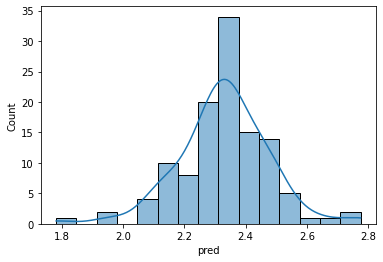

In [ ]:
import seaborn as sns
sns.histplot(data=df_gr, x="pred", kde=True)

(array([ 1.,  2.,  2., 12., 22., 40., 24., 10.,  2.,  2.]),
 array([1.7808642 , 1.88031401, 1.97976382, 2.07921363, 2.17866345,
        2.27811326, 2.37756307, 2.47701288, 2.57646269, 2.67591251,
        2.77536232]),
 <a list of 10 Patch objects>)

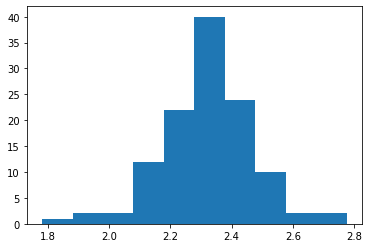

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_gr['pred'])

In [ ]:
test_data3['pred'].value_counts()

1    27047
2    19044
3    16990
0     6665
4     5277
Name: pred, dtype: int64

In [ ]:
# 빈도수
test_data4 = test_data.copy()
test_data4['pred'] = test_data3['pred'].values 
test_data4['pred'] = test_data4['pred'].astype('int')
df_gr = test_data4.groupby('date')[['target', 'pred', 'targetpm']].mean()
df_date = df_gr.index
for idx in df_date:
  df_gr.loc[idx, 'cnt_pred'] = int(test_data4[test_data4['date'] == idx ]['pred'].value_counts().idxmax())

# df_gr.head(20)
df_gr['cnt_pred'] = df_gr['cnt_pred'].apply(lambda x : int(np.round(x)))
# df_gr['standard']=(df_gr['pred']-np.mean(df_gr['pred']))/np.std(df_gr['pred'])
# df_gr['pred_label'] = df_gr['standard'].apply(lambda x: 0 if x<-1 else
#                                                                     1 if x<-0.25 else
#                                                                     2 if x<0.25 else
#                                                                     3 if x<1 else
#                                                                     4 )
df_gr['pred_label'] = df_gr['cnt_pred'].apply(lambda x : int(np.round(x)))

df_gr['pred_pm'] = df_gr['pred_label'].apply(lambda x: 1 if x< 2 else 3)

# pre_mean = 2 - df_gr['pred'].median()


df_gr = df_gr.reset_index()
for idx in df_gr.index :
  if df_gr.loc[idx, 'target'] == df_gr.loc[idx, 'pred_label']:
    temp_eval = True
  else :
    temp_eval = False
  df_gr.loc[idx, 'eval_5'] = temp_eval

for idx in df_gr.index :
  if df_gr.loc[idx, 'target'] == 0 :
    df_gr.loc[idx, 'target_3label'] = 1
  elif df_gr.loc[idx, 'target'] == 4 :
    df_gr.loc[idx, 'target_3label'] = 3
  else :
    df_gr.loc[idx, 'target_3label'] = int(df_gr.loc[idx, 'target'])

  if df_gr.loc[idx, 'pred_label'] == 0 :
    df_gr.loc[idx, 'pred_label_3label'] = 1
  elif df_gr.loc[idx, 'pred_label'] == 4 :
    df_gr.loc[idx, 'pred_label_3label'] = 3
  else :
    df_gr.loc[idx, 'pred_label_3label'] = int(df_gr.loc[idx, 'pred_label'])

df_gr['pred_label_3label'] = df_gr['pred_label_3label'].apply(lambda x : int(x))

for idx in df_gr.index :
  if df_gr.loc[idx, 'target_3label'] == df_gr.loc[idx, 'pred_label_3label']:
    temp_eval = True
  else :
    temp_eval = False
  df_gr.loc[idx, 'eval_3'] = temp_eval

for idx in df_gr.index :
  if df_gr.loc[idx, 'targetpm'] == df_gr.loc[idx, 'pred_pm']:
    temp_eval = True
  else :
    temp_eval = False
  df_gr.loc[idx, 'eval_pm'] = temp_eval



print('5중분류 정확도 :', round(df_gr['eval_5'].sum() / len(df_gr), 2), '\n')
print('3중분류 정확도 :', round(df_gr['eval_3'].sum() / len(df_gr), 2), '\n')
print('이진분류 정확도 :', round(df_gr['eval_pm'].sum() / len(df_gr), 2), '\n')

# for nm in np.arange(-1, 1, 0.1) :
#   df_gr['pred_mean_temp'] = (df_gr['pred'] + nm).apply(lambda x : 3 if x >= 2 else 1)
#   for idx in df_gr.index :
#     if df_gr.loc[idx, 'targetpm'] == df_gr.loc[idx, 'pred_mean_temp']:
#       temp_eval = True
#     else :
#       temp_eval = False
#     df_gr.loc[idx, 'eval_pm_mean_temp'] = temp_eval
#   print('이진분류 보정 정확도 :', '보정치:', round(nm, 1) , round(df_gr['eval_pm_mean_temp'].sum() / len(df_gr), 2), '\n')
df_gr.head()

5중분류 정확도 : 0.22 

3중분류 정확도 : 0.29 

이진분류 정확도 : 0.44 



,date,target,pred,targetpm,cnt_pred,pred_label,pred_pm,eval_5,target_3label,pred_label_3label,eval_3,eval_pm
0,2017-12-12,2.0,1.854415,3.0,1,1,1,False,2.0,1,False,False
1,2018-01-12,1.0,1.725490,1.0,1,1,1,True,1.0,1,True,True
2,2018-01-31,3.0,1.756184,3.0,1,1,1,False,3.0,1,False,False
3,2018-04-20,2.0,1.639640,3.0,1,1,1,False,2.0,1,False,False
4,2018-05-04,2.0,1.969349,1.0,1,1,1,False,2.0,1,False,True


In [ ]:
test_data4 = test_data.copy()
test_data4['pred'] = test_data3['pred'].values 
test_data4['pred'] = test_data4['pred'].astype('int')
df_gr = test_data4.groupby('date')[['target', 'pred', 'targetpm']].mean()
df_gr['count'] = test_data4.groupby('date')[['target', 'pred']].count()['target']
df_gr['pred'] = df_gr['pred'] + 0.5
# df_gr['pred_label'] = df_gr['pred'].apply(lambda x : int(np.round(x)))
# df_gr['pred_pm'] = df_gr['pred'].apply(lambda x : 3 if x >= 2 else 1)
df_gr['target'] = df_gr['target'].apply(lambda x : int(np.round(x)))
df_gr['standard']=(df_gr['pred']-np.mean(df_gr['pred']))/np.std(df_gr['pred'])
df_gr['pred_label'] = df_gr['standard'].apply(lambda x: 0 if x<-1 else
                                                                    1 if x<-0.25 else
                                                                    2 if x<0.25 else
                                                                    3 if x<1 else
                                                                    4 )

df_gr['pred_pm'] = df_gr['pred_label'].apply(lambda x: 1 if x< 0 else 3)

# pre_mean = 2 - df_gr['pred'].median()


df_gr = df_gr.reset_index()
for idx in df_gr.index :
  if df_gr.loc[idx, 'target'] == df_gr.loc[idx, 'pred_label']:
    temp_eval = True
  else :
    temp_eval = False
  df_gr.loc[idx, 'eval_5'] = temp_eval

for idx in df_gr.index :
  # if df_gr.loc[idx, 'target'] == -2 :
  #   df_gr.loc[idx, 'target_3label'] = -1
  # elif df_gr.loc[idx, 'target'] == 2 :
  #   df_gr.loc[idx, 'target_3label'] = 1

  if df_gr.loc[idx, 'pred_label'] == 0 :
    df_gr.loc[idx, 'pred_label_3label'] = 1
  elif df_gr.loc[idx, 'pred_label'] == 4 :
    df_gr.loc[idx, 'pred_label_3label'] = 3
  else :
    df_gr.loc[idx, 'pred_label_3label'] = int(df_gr.loc[idx, 'pred_label'])

df_gr['pred_label_3label'] = df_gr['pred_label_3label'].apply(lambda x : int(x))

for idx in df_gr.index :
  if df_gr.loc[idx, 'target'] == df_gr.loc[idx, 'pred_label_3label']:
    temp_eval = True
  else :
    temp_eval = False
  df_gr.loc[idx, 'eval_3'] = temp_eval

for idx in df_gr.index :
  if df_gr.loc[idx, 'targetpm'] == df_gr.loc[idx, 'pred_pm']:
    temp_eval = True
  else :
    temp_eval = False
  df_gr.loc[idx, 'eval_pm'] = temp_eval



print('5중분류 정확도 :', round(df_gr['eval_5'].sum() / len(df_gr), 2), '\n')
print('3중분류 정확도 :', round(df_gr['eval_3'].sum() / len(df_gr), 2), '\n')
print('이진분류 정확도 :', round(df_gr['eval_pm'].sum() / len(df_gr), 2), '\n')

# for nm in np.arange(-1, 1, 0.1) :
#   df_gr['pred_mean_temp'] = (df_gr['pred'] + nm).apply(lambda x : 3 if x >= 2 else 1)
#   for idx in df_gr.index :
#     if df_gr.loc[idx, 'targetpm'] == df_gr.loc[idx, 'pred_mean_temp']:
#       temp_eval = True
#     else :
#       temp_eval = False
#     df_gr.loc[idx, 'eval_pm_mean_temp'] = temp_eval
#   print('이진분류 보정 정확도 :', '보정치:', round(nm, 1) , round(df_gr['eval_pm_mean_temp'].sum() / len(df_gr), 2), '\n')
df_gr.head()

5중분류 정확도 : 0.26 

3중분류 정확도 : 0.27 

이진분류 정확도 : 0.62 



,date,target,pred,targetpm,count,standard,pred_label,pred_pm,eval_5,pred_label_3label,eval_3,eval_pm
0,2017-12-12,2,1.854415,3.0,419,0.176019,2,3,True,2,True,True
1,2018-01-12,1,1.725490,1.0,255,-0.693090,1,3,True,1,True,False
2,2018-01-31,3,1.756184,3.0,283,-0.486179,1,3,False,1,False,True
3,2018-04-20,2,1.639640,3.0,222,-1.271826,0,3,False,1,False,True
4,2018-05-04,2,1.969349,1.0,261,0.950807,3,3,False,3,False,False


In [ ]:
df_gr['pred_label'].value_counts()

2    33
3    28
1    25
0    17
4    14
Name: pred_label, dtype: int64

In [ ]:
df_gr['pred'].mean()

1.8283043420534775

In [ ]:
df_gr['eval_pm']

0      False
1       True
2      False
3      False
4       True
       ...  
112    False
113    False
114     True
115    False
116    False
Name: eval_pm, Length: 117, dtype: object

In [ ]:
df_gr['eval_pm_mean_temp'].value_counts()

True     73
False    44
Name: eval_pm_mean_temp, dtype: int64

In [ ]:
df_gr['targetpm'].value_counts()

3.0    73
1.0    44
Name: targetpm, dtype: int64

In [ ]:
df_gr['pred_pm'].value_counts()

1    106
3     11
Name: pred_pm, dtype: int64

In [ ]:
df_gr['eval_pm'].value_counts()

False    74
True     43
Name: eval_pm, dtype: int64

In [ ]:
df_gr['eval_pm_mean'].value_counts()

False    68
True     49
Name: eval_pm_mean, dtype: int64

In [ ]:
df_gr['pred_label'].value_counts()

2    114
1      3
Name: pred_label, dtype: int64